# Hypothesis testing with red wine & loan data

## Variants of hypothesis testing

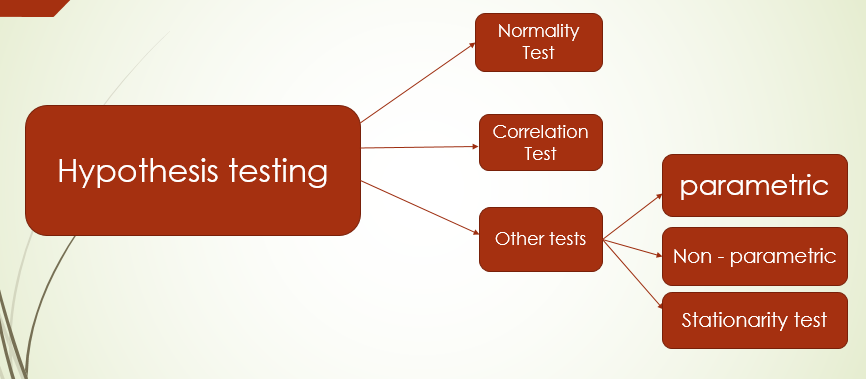

## Process of hypothesis testing

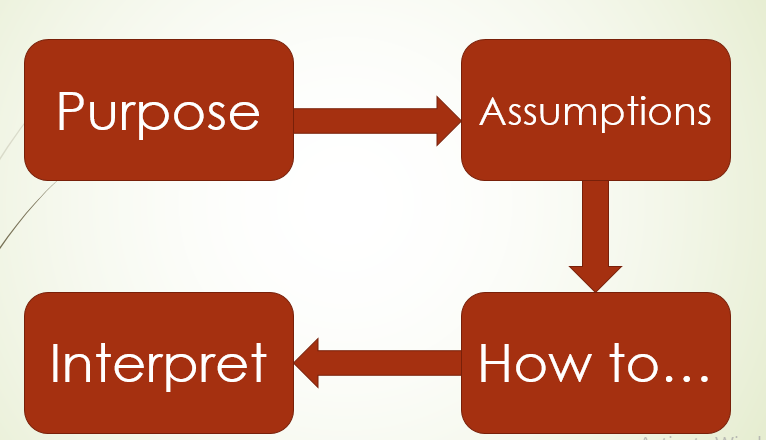

## Practical implementation with read wine data

Data source: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

https://www.youtube.com/watch?v=sMrZzHDpFCU&list=PLLVfjXL2pnkTur35C2OBk6SRxCrt6zeVc

### Normality test using Sharpio-Wilk test to see if the data is normally distributed

Assumption: Observations are independently and identically distributed (i.i.d.)

In [3]:
# Data import
import pandas as pd
wine_data = pd.read_csv('winequality_red.csv')

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


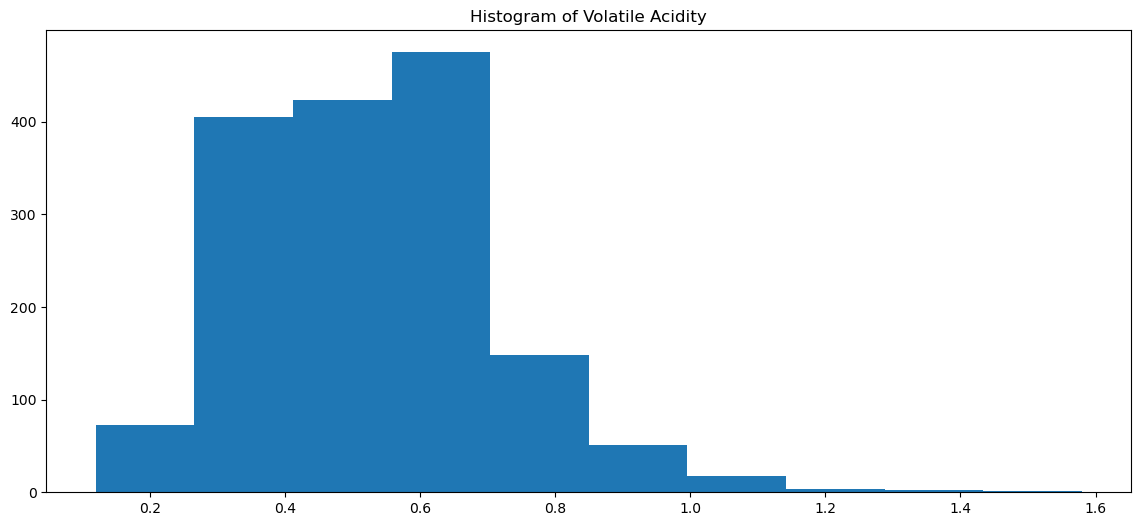

In [5]:
# Check histogram of 'volatile acidity'
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(wine_data['volatile acidity']) 
pyplot.title('Histogram of Volatile Acidity')
pyplot.show()

By looking at the histogram, we can see that the data is not normally distributed or left skewed. However, we will run a normality test to check if the data is normally distributed.

In [6]:
from scipy.stats import shapiro 

# Normality test
stat, p = shapiro(wine_data['volatile acidity'])
print('Statistics=%.3f, p=%.30f' % (stat, p)) 
# interpret
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=0.974, p=0.000000000000000269293473571273
Data does not look Gaussian (reject H0)


### Normality test using K^2 normality test to see if the data is normally distributed

Assumption: Observations are independently and identically distributed (i.i.d.)

In [7]:
# Example of the D’Agostino’s K^2 Normality Test
import scipy
import scipy.stats
from scipy.stats import normaltest

stat, p = normaltest(wine_data['volatile acidity'])

print('stat=%.10f, p=%10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not normally distributed')

stat=143.4193435598, p=  0.000000
Not normally distributed


## Correlation test - Pearson and Spearman's rank correlation
Assumption: Identical and normal distribution

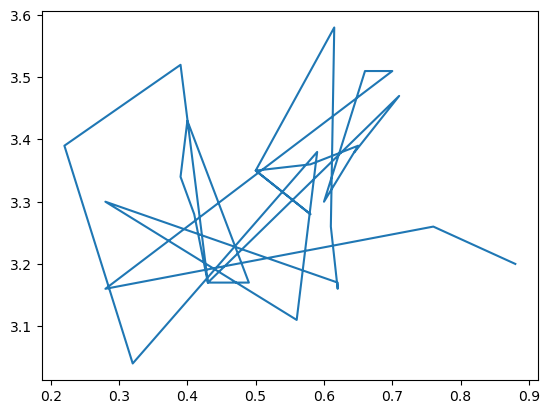

In [16]:
first_sample = wine_data[1:30]['volatile acidity']
second_sample = wine_data[1:30]['pH']

# pyplot.plot(first_sample, second_sample)
plt.plot(first_sample, second_sample)
plt.show()

From the graph above, we can see that there is no correlation between the two samples.

In [20]:
# Spearman's rank correlation
from scipy.stats import spearmanr
stat, p = spearmanr(first_sample, second_sample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=0.199, p=0.301357
Probably independent


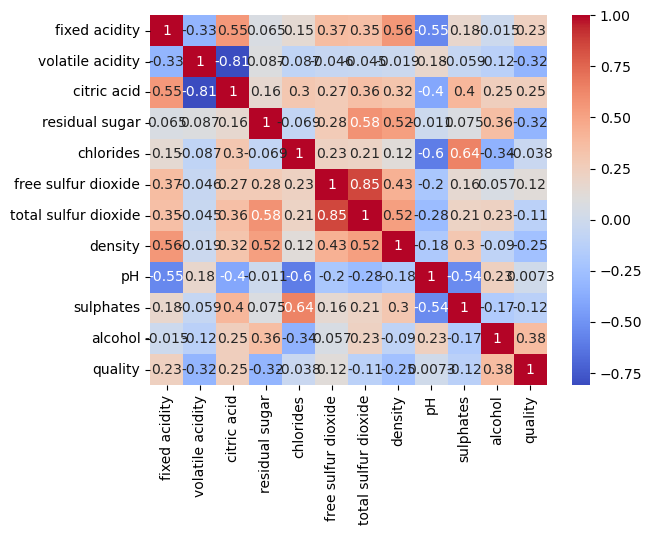

In [23]:
import seaborn as sns
# Select the desired subset of data
subset_data = wine_data[1:30]

# Calculate the correlation using the Pearson method
correlation_matrix = subset_data.corr(method='pearson')

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Correlation of categorical variables - Chi Squared test
Test whether two categorical variables are related or independent.
Assumption: Observations are independent, size in each box of contigency table > 25

Data source: https://www.kaggle.com/datasets/puneeshk/lending-loan-club-dataset

In [26]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

C:\Users\hamin\AppData\Local\Temp\ipykernel_40276\174373214.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [29]:
columns = loan_data.columns
print(columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [31]:
# Select the features for analysis
loan_data_subset = loan_data[['grade', 'sub_grade', 'loan_status','purpose']]

In [36]:
loan_data_subset.head(10)

,grade,sub_grade,loan_status,purpose
0,B,B2,Fully Paid,credit_card
1,C,C4,Charged Off,car
2,C,C5,Fully Paid,small_business
3,C,C1,Fully Paid,other
4,B,B5,Current,other
5,A,A4,Fully Paid,wedding
6,C,C5,Fully Paid,debt_consolidation
7,E,E1,Fully Paid,car
8,F,F2,Charged Off,small_business
9,B,B5,Charged Off,other


In [35]:
contigency_data = pd.crosstab(loan_data_subset['purpose'], loan_data_subset['loan_status'], margins = False)
contigency_data

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484
